# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [75]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [76]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

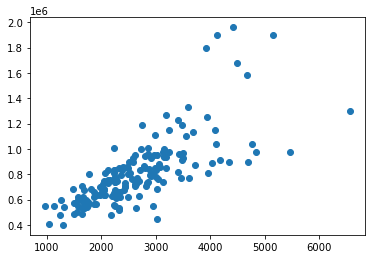

In [77]:
y = df[df['zipcode'] == 98005]['price']
x = df[df['zipcode'] == 98005]['sqft_living']

plt.scatter(x, y)

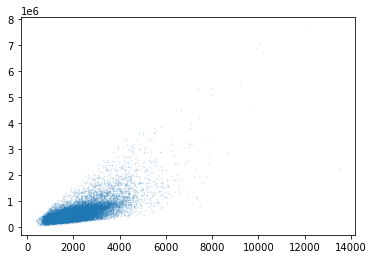

In [78]:
# sqft_living
# price

x = df['sqft_living']
y = df['price']

plt.scatter(x, y, alpha = .15, s= .4)

In [79]:
df[df['zipcode'] == 98005].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.293229,0.602608,0.740920,0.566596,0.435987,0.777308,0.427175,0.098636,NaN,0.529695,0.198970,0.674625,0.397516
bedrooms,0.293229,1.000000,0.362850,0.545460,0.299922,0.084771,0.302207,0.026695,-0.081983,NaN,0.218388,0.143646,0.275105,0.222452
bathrooms,0.602608,0.362850,1.000000,0.716835,0.383228,0.478232,0.620989,0.550833,0.041331,NaN,0.387685,0.226978,0.536440,0.345951
sqft_living,0.740920,0.545460,0.716835,1.000000,0.510779,0.426776,0.786090,0.401876,0.004121,NaN,0.499581,0.185618,0.658809,0.403712
sqft_lot,0.566596,0.299922,0.383228,0.510779,1.000000,0.321917,0.504037,0.166455,-0.013749,NaN,0.611847,0.283477,0.600156,0.619629
floors,0.435987,0.084771,0.478232,0.426776,0.321917,1.000000,0.652533,0.620710,-0.102883,NaN,0.388322,0.342794,0.418034,0.221950
sqft_above,0.777308,0.302207,0.620989,0.786090,0.504037,0.652533,1.000000,0.454368,0.079430,NaN,0.546579,0.259574,0.696711,0.399360
yr_built,0.427175,0.026695,0.550833,0.401876,0.166455,0.620710,0.454368,1.000000,-0.211315,NaN,0.238243,0.361009,0.318313,0.161520
yr_renovated,0.098636,-0.081983,0.041331,0.004121,-0.013749,-0.102883,0.079430,-0.211315,1.000000,NaN,0.040105,-0.041954,-0.081255,0.020770
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

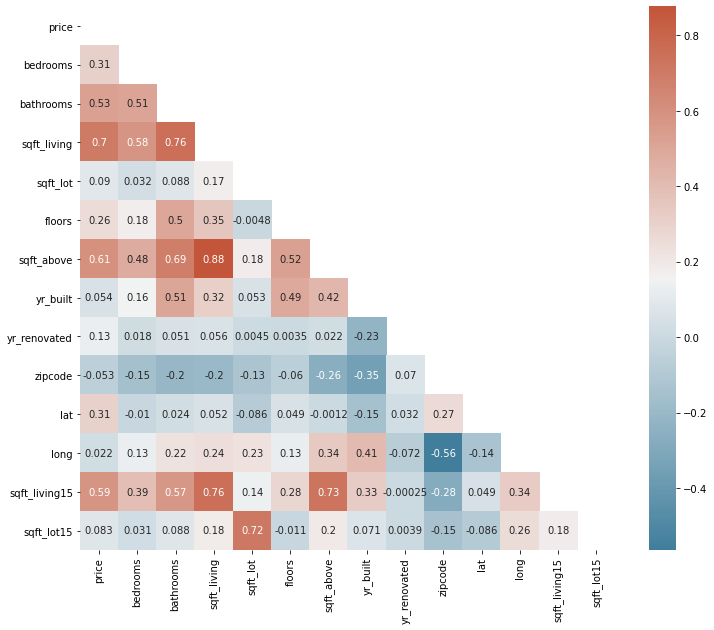

In [80]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [81]:
'''
SET TO REMOVE
'''

# heat2 = df.drop('sqft_living', axis=1).corr()
# f, ax = plt.subplots(figsize=(12, 10))
# mask2 = np.triu(np.ones_like(heat2, dtype=bool))
# sns.heatmap(heat2, annot=True, mask=mask2, cmap=cmap)

'\nSET TO REMOVE\n'

In [82]:
zipcodes = pd.get_dummies(df.zipcode)
zip_cat = pd.concat([df, zipcodes], axis=1) # df with OHE by zipcode # no dropped columns

In [83]:
# zip_cat -- Entire df + Zipcode(OHE)
# zip_price -- Price + Sqft_living + Zipcode(OHE)
# grade_cat -- Price + Sqft_living + Zipcode(OHE) + Grade(OHE)

In [84]:
# SIMPLE LINEAR REGRESSION (X = SQFT, Y = PRICE)

lr = LinearRegression()

x1 = np.array(df['sqft_living']).reshape(-1, 1) # reshape required for single feature
y1 = df['price']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=.2)

lr.fit(x1_train, y1_train)

lr.score(x1_test, y1_test)

# LOW R2 ~0.47

0.49108501711264096

In [85]:
# MODELED USING X = ZIPCODES(OHE), Y = PRICE

x2 = zipcodes
y2 = df.price

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=.2)

lr.fit(x2_train, y2_train)

lr.score(x2_test, y2_test)

# LOW R2 ~0.44

0.36976281949202416

In [86]:
# MULTIPLE LINEAR REGREESSION INCLUDING X = SQFT + ZIPCODES(OHE), Y = PRICE

zip_price = pd.concat([df.price, df.sqft_living, zipcodes], axis=1)

y3 = zip_price.price
x3 = zip_price.drop('price', axis=1)

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=.2)

lr.fit(x3_train, y3_train)

lr.score(x3_test, y3_test) 

# TOGETHER SQUARE FOOTAGE AND ZIPCODES CORRELATE MUCH BETTER TO SALE PRICE
# R2 ~ .72

0.7340500976586188

In [87]:
# MULTIPLE LINEAR REGREESSION INCLUDING X = SQFT + ZIPCODES(OHE) + GRADE(OHE), Y = PRICE

grade_cat = pd.concat([zip_price, pd.get_dummies(df.grade)], axis=1)

y4 = grade_cat.price
x4 = grade_cat.drop('price', axis=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

lr.fit(x4_train, y4_train)

lr.score(x4_test, y4_test) 

# ADDITION OF GRADE OF HOME IMPROVES THE MODEL
# R2 ~ 0.78

# GRADE NOT STRAIGHTFORWARD FOR USER INPUT

0.8101308279823667

In [88]:
# OLS PRINTOUT OF 4TH ITTERATIVE MODEL

price = y4_train
preds = x4_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     739.3
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:52:07   Log-Likelihood:            -2.3287e+05
No. Observations:               17277   AIC:                         4.659e+05
Df Residuals:                   17196   BIC:                         4.665e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     175.4769      2.343     74.902      0.000     170.885     180.069
98001          -1.42e+05   1.05e+04    -13.569      0.000   -1.63e+05   -1.22e+05
98002         -1.271e+05   1.41e+04     -9.013      0.000   -1.55e+05   -9.95e+04
98003         -1.358e+05   1.19e+04    -11.370      0.000   -1.59e+05   -1.12e+05
98004          6.301e+05   1.12e+04     56.143      0.000    6.08e+05    6.52e+05
98005          1.631e+05   1.51e+04     10.769      0.000    1.33e+05    1.93e+05
98006           1.25e+05   9277.262     13.478      0.000    1.07e+05    1.43e+05
98007          1.084e+05   1.61e+04      6.715      0.000    7.67e+04     1.4e+05
98008          1.752e+05   1.15e+04     15.176      0.000    1.53e+05    1.98e+05
98010          -7.09e+04   1.91e+04     -3.706      0.000   -1.08e+05   -3.34e+04
98011         -1.631e+04   1.39e+04     -1.177      0.239   -4.35e+04    1.09e+04
98014         -3.652e+04   1.73e+04     -2.113      0.035   -7.04e+04   -2648.220
98019         -5.494e+04   1.43e+04     -3.846      0.000   -8.29e+04   -2.69e+04
98022         -9.727e+04   1.27e+04     -7.682      0.000   -1.22e+05   -7.24e+04
98023         -1.639e+05   9106.975    -17.999      0.000   -1.82e+05   -1.46e+05
98024          1.758e+04   2.19e+04      0.801      0.423   -2.54e+04    6.06e+04
98027          1.837e+04   9724.134      1.889      0.059    -690.580    3.74e+04
98028         -1.583e+04   1.19e+04     -1.326      0.185   -3.92e+04    7568.937
98029          7.041e+04   1.12e+04      6.312      0.000    4.85e+04    9.23e+04
98030          -1.42e+05   1.26e+04    -11.307      0.000   -1.67e+05   -1.17e+05
98031         -1.266e+05   1.18e+04    -10.764      0.000    -1.5e+05   -1.04e+05
98032         -1.351e+05   1.78e+04     -7.595      0.000    -1.7e+05      -1e+05
98033          2.353e+05   9493.477     24.780      0.000    2.17e+05    2.54e+05
98034          6.876e+04   8838.628      7.780      0.000    5.14e+04    8.61e+04
98038          -1.12e+05   8364.725    -13.393      0.000   -1.28e+05   -9.56e+04
98039          1.022e+06    2.8e+04     36.455      0.000    9.67e+05    1.08e+06
98040          4.051e+05   1.21e+04     33.362      0.000    3.81e+05    4.29e+05
98042         -1.328e+05   8712.946    -15.240      0.000    -1.5e+05   -1.16e+05
98045         -3.857e+04   1.35e+04     -2.857      0.004    -6.5e+04   -1.21e+04
98052          9.756e+04   8495.017     11.484      0.000    8.09e+04    1.14e+05
98053           6.26e+04   9974.382      6.276      0.000     4.3e+04    8.22e+04
98055         -9.484e+04   1.21e+04     -7.819      0.000   -1.19e+05   -7.11e+04
98056         -3.671e+04   9828.759     -3.735      0.000    -5.6e+04   -1.74e+04
98058         -1.094e+05   9326.835    -11.733      0.000   -1.28e+05   -9.12e+04
98059         -6.534e+04   9292.480     -7.032   

In [89]:
# SET TO DELETE -- ITTERATIONS WERE SPLIT INTO THEIR OWN CELLS ABOVE

'''zip_price = pd.concat([df.price, df.sqft_living, zipcodes], axis=1) #grade_labels[0].astype('int64')

# y = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].price
# x = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].sqft_living

# plt.scatter(x, y)
# grade_set = list(set(zip_price[0]))

# zip_price[(zip_price[0] == 7) & (zip_price[98001] == 1)]

# x2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].sqft_living
# y2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].price

# plt.scatter(x2, y2)

y3 = zip_price.price
x3 = zip_price.drop('price', axis=1)

lr = LinearRegression()

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=.2)

lr.fit(x3_train, y3_train)

lr.score(x3_test, y3_test) # ~.75 

# try making the grade categorical

grade_cat = zip_price#.drop(0, axis=1)
grade_cat = pd.concat([grade_cat, pd.get_dummies(df.grade)], axis=1)

y4 = grade_cat.price
x4 = grade_cat.drop('price', axis=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

lr.fit(x4_train, y4_train)

lr.score(x4_test, y4_test) # ~.77

grade_cat

price = y4_train
preds = x4_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

# lr.predict()
# grade_cat

y5 = grade_cat.price
x5 = grade_cat.drop('price', axis=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

lr.fit(x4_train, y4_train)

price = y5_train
preds = x5_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()
'''

"zip_price = pd.concat([df.price, df.sqft_living, zipcodes], axis=1) #grade_labels[0].astype('int64')\n\n# y = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].price\n# x = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].sqft_living\n\n# plt.scatter(x, y)\n# grade_set = list(set(zip_price[0]))\n\n# zip_price[(zip_price[0] == 7) & (zip_price[98001] == 1)]\n\n# x2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].sqft_living\n# y2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].price\n\n# plt.scatter(x2, y2)\n\ny3 = zip_price.price\nx3 = zip_price.drop('price', axis=1)\n\nlr = LinearRegression()\n\nx3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=.2)\n\nlr.fit(x3_train, y3_train)\n\nlr.score(x3_test, y3_test) # ~.75 \n\n# try making the grade categorical\n\ngrade_cat = zip_price#.drop(0, axis=1)\ngrade_cat = pd.concat([grade_cat, pd.get_dummies(df.grade)], axis=1)\n\ny4 = grade_cat.price\nx4 = grade_cat.drop('price', axis=1)\n

In [98]:
# Model Choosen

# X = SQFT_LIVING, ZIPCODES(OHE), BEDROOMS, BATHROOMS
# Y = PRICE

y6 = df.price
x6 = pd.concat([df.sqft_living, df.bedrooms, df.bathrooms, zipcodes], axis=1)

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=.2)

lr.fit(x6_train, y6_train)

lr.score(x6_test, y6_test)

# R2 ~ 0.74

0.732523041061643

actual price = $339950
predicted price = $345182.58


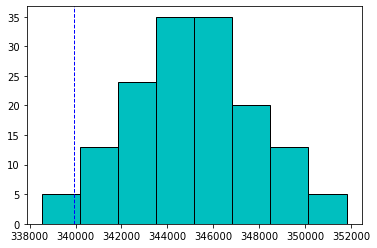

In [198]:
import random
import seaborn as sns

def rep_model(x, y, reps=10):

    random_index = random.randint(0, x.shape[0])

    random_x = x.sample(random_state=random_index, axis=0)
    random_y = y.sample(random_state=random_index, axis=0)
    
    guesses = []
    
    for i in range(reps):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
        lr.fit(x_train, y_train)
        guesses.append(int(lr.predict(random_x)))
    
    print(f'actual price = ${int(random_y.values)}')
    print(f'predicted price = ${np.mean(guesses)}')
    
    plt.hist(x=guesses, bins=8, color='c', edgecolor='k')
    plt.axvline(random_y.values, color='b', linestyle='dashed', linewidth=1);
    
    return
    
rep_model(x6, y6, reps=150)

In [91]:
# OLS PRINTOUT OF ABOVE MODEL

price = y6_train
preds = x6_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     676.0
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:52:08   Log-Likelihood:            -2.3470e+05
No. Observations:               17277   AIC:                         4.695e+05
Df Residuals:                   17204   BIC:                         4.701e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -5.119e+04   2077.866    -24.634      0.000   -5.53e+04   -4.71e+04
bathrooms    1.038e+04   3015.098      3.442      0.001    4468.667    1.63e+04
sqft_living   281.4173      2.735    102.908      0.000     276.057     286.777
98001       -1.009e+05   1.27e+04     -7.965      0.000   -1.26e+05   -7.61e+04
98002       -7.278e+04   1.63e+04     -4.459      0.000   -1.05e+05   -4.08e+04
98003       -9.503e+04   1.42e+04     -6.704      0.000   -1.23e+05   -6.72e+04
98004        7.134e+05   1.37e+04     52.149      0.000    6.87e+05     7.4e+05
98005        2.339e+05   1.79e+04     13.068      0.000    1.99e+05    2.69e+05
98006         2.18e+05   1.19e+04     18.328      0.000    1.95e+05    2.41e+05
98007        1.729e+05    1.9e+04      9.110      0.000    1.36e+05     2.1e+05
98008        2.144e+05   1.44e+04     14.928      0.000    1.86e+05    2.43e+05
98010       -3.836e+04   2.31e+04     -1.658      0.097   -8.37e+04    6997.134
98011        1.389e+04   1.65e+04      0.842      0.400   -1.84e+04    4.62e+04
98014       -4655.8021   1.97e+04     -0.236      0.813   -4.33e+04     3.4e+04
98019       -3.694e+04   1.69e+04     -2.186      0.029   -7.01e+04   -3812.630
98022       -5.905e+04   1.55e+04     -3.813      0.000   -8.94e+04   -2.87e+04
98023       -1.186e+05   1.13e+04    -10.463      0.000   -1.41e+05   -9.64e+04
98024        6.803e+04   2.53e+04      2.688      0.007    1.84e+04    1.18e+05
98027        6.176e+04   1.24e+04      4.990      0.000    3.75e+04     8.6e+04
98028        1.779e+04   1.42e+04      1.251      0.211   -1.01e+04    4.57e+04
98029        1.158e+05   1.36e+04      8.515      0.000    8.91e+04    1.42e+05
98030        -9.85e+04    1.5e+04     -6.575      0.000   -1.28e+05   -6.91e+04
98031       -9.005e+04   1.43e+04     -6.276      0.000   -1.18e+05   -6.19e+04
98032       -8.126e+04   2.01e+04     -4.034      0.000   -1.21e+05   -4.18e+04
98033        2.954e+05   1.24e+04     23.880      0.000    2.71e+05     3.2e+05
98034        1.215e+05   1.09e+04     11.147      0.000       1e+05    1.43e+05
98038       -8.496e+04   1.08e+04     -7.838      0.000   -1.06e+05   -6.37e+04
98039        1.322e+06   3.23e+04     40.943      0.000    1.26e+06    1.39e+06
98040        5.263e+05   1.48e+04     35.568      0.000    4.97e+05    5.55e+05
98042         -9.2e+04    1.1e+04     -8.332      0.000   -1.14e+05   -7.04e+04
98045       -2071.1092   1.58e+04     -0.131      0.896    -3.3e+04    2.88e+04
98052        1.387e+05    1.1e+04     12.576      0.000    1.17e+05     1.6e+05
98053        8.223e+04   1.23e+04      6.686      0.000    5.81e+04    1.06e+05
98055       -4.881e+04   1.44e+04     -3.379      0.001   -7.71e+04   -2.05e+04
98056        1.864e+04   1.22e+04      1.527      0.127   -5284.680    4.26e+04
98058       -6.276e+04   1.19e+04     -5.26

In [92]:
bed_bath = x6['bedrooms']/x6['bathrooms'] # CREATING RATIO FOR MODEL
calc_df = pd.concat([zip_price, bed_bath], axis=1)
calc_df.rename(columns={0: 'bed_over_bath'}, inplace=True)
# calc_df.corr()

# bed/bath has slight neg corr to price and sqft ~ -0.24, -0.32
# possibly try bath/bed

x10 = calc_df.drop('price', axis=1)
y10 = calc_df.price

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=.2)

lr.fit(x10_train, y10_train)

lr.score(x10_test, y10_test)

# R2 ~ 0.73

0.7204816322745086

In [93]:
bath_bed = x6['bathrooms']/x6['bedrooms'] # CREATING RATIO FOR MODEL 
calc_df2 = pd.concat([zip_price, bed_bath], axis=1)
calc_df2.rename(columns={0: 'bath_bed'}, inplace=True)

# calc_df2.corr()

# same corr as above ~ -0.24, -0.32

x11 = calc_df2.drop('price', axis=1)
y11 = calc_df2.price

x11_train, x11_test, y11_train, y11_test = train_test_split(x11, y11, test_size=.2)

lr.fit(x11_train, y11_train)

lr.score(x11_test, y11_test)

# R ~ 0.73

# no difference between testing variable independently or either ratio

0.7386085861413486

In [95]:
# MODEL WITH BEDROOMS VARIABLE EXCLUDED 

x12 = pd.concat([df.sqft_living, df.bathrooms, zipcodes], axis=1)
y12 = df.price

x12_train, x12_test, y12_train, y12_test = train_test_split(x12, y12, test_size=.2)

lr.fit(x12_train, y12_train)

lr.score(x12_test, y12_test)

<class 'sklearn.linear_model._base.LinearRegression'>


0.7421009586461282

In [ ]:
# ABOVE IS CLEAN

In [13]:
np.random.seed(42)
sample_pt = zip_cat.sample(1)
sample_pt_price = zip_cat.iloc[0,1]
sample = sample_pt.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

# Show my random sample off
print(f'Price of sample: ${sample_pt_price}')
sample

Price of sample: $221900.0


,bedrooms,bathrooms,sqft_living,98001,98002,98003,98004,98005,98006,98007,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
id,,,,,,,,,,,,,,,,,,,,,
6303401050,3,0.75,850,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        y_hat = lr7.predict(x7_test)
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

In [15]:
#x axis actual prices, y axis normalize predictions
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()
    
    x_axis = [] # actual price
    y_axis = [] # % error

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        
        y_hat = lr7.predict(x7_test)
        
        x_axis.append(y7_test)
        y_axis.append((y_hat-y7_test)/y7_test)# predicted price - acutal price / actual price
        
        plt.scatter(x_axis, y_axis, s=.1, alpha=.2)
        plt.xlim(0,1000000)
        plt.ylim(-1, 1)
        
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

([189953.43559865048,
  186514.0562960305,
  184994.92517960852,
  178841.8198247315,
  184682.20266204185],
 [0.744623803667082,
  0.7385545430814306,
  0.7428758586681934,
  0.7298956199762343,
  0.7541472936061067],
 [155301.234375,
  138840.08203125,
  143472.6796875,
  138367.255859375,
  140760.95336914062])

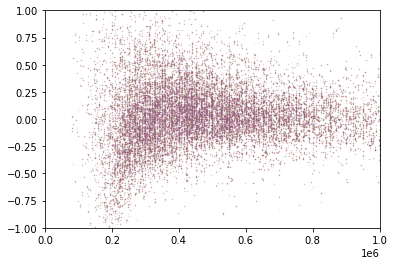

In [16]:
train_lr_randomly(data=zip_cat,sample_pt=sample, ntimes=5)

In [17]:
zip_cat.price.median()

450000.0

In [18]:
y7 = zip_cat.price
x7 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)


linreg = LinearRegression()
linreg.fit(x7_train, y7_train)
y_hat_train = linreg.predict(x7_train)
y_hat_test = linreg.predict(x7_test)
train_res = y_hat_train - y7_train
test_res = y_hat_test - y7_test
mse_train = mean_squared_error(y7_train, y_hat_train)
mse_test = mean_squared_error(y7_test, y_hat_test)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))

188010.5729354791
187923.48416819476


In [20]:
def price_predictor():
    beds = int(input('How many bedrooms?'))
    baths = int(input('How many bathrooms?'))
    sqft = int(input('How many square feet?'))
    zip_ = int(input('What is the zipcode?'))
    
    entry = pd.DataFrame(0, index=['sample'], columns=x6.columns)
    entry['bedrooms'] = beds
    entry['bathrooms'] = baths
    entry['sqft_living'] = sqft
    entry[zip_] = 1
    
    price_target = f'${round(float(lr.predict(entry)), 2)}'
    return price_target

price_predictor()

How many bedrooms?3
How many bathrooms?2
How many square feet?1200
What is the zipcode?98001


'$104786.66'

In [22]:
import folium
location = df.groupby('zipcode')[['lat', 'long']].mean()
long = location['long']
lat = location['lat']
price = df.groupby('zipcode')['price'].median()
zip_1 = location.index

base_map = folium.Map([47.6, -122.25], zoom_start=11)

points = list(zip(lat, long, price, zip_1))
for p in points:
    lat = p[0]
    long = p[1]
    zip_1 = p[3]
    price = f'{zip_1} : ${str(p[2])}'
#     marker = folium.Marker(location=[lat, long])
    popup = folium.Popup(price, parse_html=True)
    
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)
    
#     marker.add_to(base_map)

base_map

# long

In [21]:
y = trimmed.price
X = trimmed.drop('price', axis=1)

trimmed.columns # sqft + zipcode

NameError: name 'trimmed' is not defined

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
model.score(X,y)

In [ ]:
x_var = df[['sqft_living']] # grade
y_var = df.price

X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=.2)

In [ ]:
model.fit(X_train,y_train)
model.score(X_test, y_test) # training = 0.49938431424133234

# USE LABEL ENCODING FOR GRADE

In [ ]:
le = LabelEncoder()

# seperate value for grade

grade_labels = df.grade.str.split(' ', 1, expand=True)
new_df = pd.concat([df.price, df.sqft_living, df.zipcode.astype('object'), grade_labels[0].astype('int64')], axis=1)

x = new_df.drop('price', axis=1)
y = new_df.price

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

model.fit(X_train,y_train)
model.score(X_test, y_test)

model.coef_

In [ ]:
# sss = new_df.reset_index().drop('id', axis=1)

In [ ]:
new_df.groupby('zipcode').count()

In [ ]:
plt.scatter(df.long, df.lat, s=1)